First we'll be recreating the cities map from Jim's lesson yesteday using `geopandas`. But first we have to install `geopandas` which is easier said than done.

if you have Anaconda, yuo should be able to:

```
conda install geopandas
```

If you're on a Mac without Anaconda, you should really install `homebrew`. Get it at [brew.sh](https://brew.sh/). It'll take a while because you need to also install XCode which is a big download. If you have Homebrew then:

```
brew install geos
brew install proj
brew install gdal
pip install cython
git clone https://github.com/jswhit/pyproj.git
cd pyproj
python setup.py install
pip install geopandas
pip install descartes
```

That (in theory) should work.

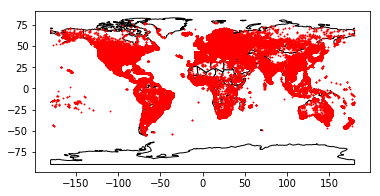

In [4]:
%matplotlib inline
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

basedir = 'basemap'

# Read a CSV into a pandas DataFrame
df = pd.read_csv(os.path.join(basedir, 'data', 'loc.csv'), sep=',')

# Add a column to hold the lat lon as a shapely.Point
df['Coords'] = list(zip(df.Lon, df.Lat))
df['Coords'] = df['Coords'].apply(Point)

# Convert the DataFrame to a GeoDataFrame using 
# the shaoely.Point to represent the geospatial data
gdf = gpd.GeoDataFrame(df, geometry='Coords')

# Geopandas ships with a set of outlines from 
# [Natural Earth](https://www.naturalearthdata.com/)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# The GeoDataFrame has a plot() method that returns an
# instance of a matplotlib.Axis. The next line plots the
# land masses and return the axis.
ax = world.plot(color='white', edgecolor='black')

# Specify the axis on which you want to plot with the ax
# keyword argument.
gdf.plot(ax=ax, color='red', marker='*', markersize=1)

plt.show()

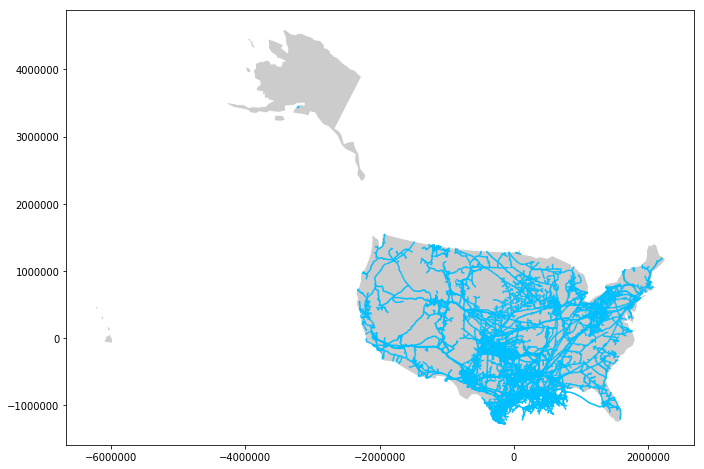

In [68]:
path = os.path.join(basedir, 'data',
                    'NaturalGas_InterIntrastate_Pipelines_US.geojson')
# Build a proj4 representation of the projection 
# we'd like to use. The one below corresponds to 
# ESRI's EPSG:102003 USA_Contiguous_Albers_Equal_Area_Conic
crs = dict(
    proj='aea', 
    lat_1=29.5, 
    lat_2=45.5, 
    lat_0=37.5, 
    lon_0=-96, 
    x_0=0, 
    y_0=0, 
    datum='NAD83', 
    units='m', 
)

# Here we're reading in a geojson file rather than 
# a CSV. Geopandas knows what to do with this information
# in order to create a GeoDataFrame so we don't have to
# convert the DataFrame like the above example.
wells = gpd.read_file(path)

# Convert the data to the desired CRS (projection)
wells = wells.to_crs(crs)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world['iso_a3'] == 'USA']
world = world.to_crs(crs)

ax = world.plot(color='#cccccc', edgecolor='#ffffff', figsize=(12, 8))
wells.plot(ax=ax, color='#00BFFF')


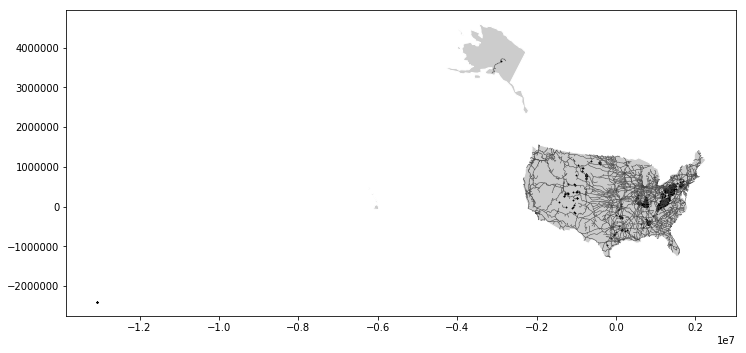

In [95]:
crs = dict(proj='aea', lat_1=29.5, lat_2=45.5, lat_0=37.5, lon_0=-96, 
           x_0=0, y_0=0, datum='NAD83', units='m', )
path = os.path.join(basedir, 'data',
                    'railrdl020.geojson')
rroad = gpd.read_file(path)
rroad = rroad.to_crs(crs)
path = os.path.join(basedir, 'data',
                    'CoalMines_US_2013.geojson')
mines = gpd.read_file(path)
mines = mines.to_crs(crs)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world['iso_a3'] == 'USA']
world = world.to_crs(crs)

ax = world.plot(color='#cccccc', edgecolor='#ffffff', figsize=(12, 8),)
rroad.plot(ax=ax, color='#444444', linewidth=.5)
mines.plot(ax=ax, color='black', marker='*', markersize=1)


This is a pretty crummy looking map. It's not large enough to show the railroads. The colors are terrible. The projection is probably not the right one. Looks like we have one stray point out in Hawai'i.

The exercise for the rest of the class is to clean up this map. Things to do:

1. Scale the mines based on the 'total_prod' column in the dataframe.
2. Use the GridSpec code Jim gave you to put Alaska and Hawai'i on different axes.
3. Choose better colors.
4. Etc.